# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:

# Criando as faixas de latitude
faixalatmaior = sinasc_raw[sinasc_raw['munResLat'] > -10.5]
faixalatmenor = sinasc_raw[sinasc_raw['munResLat'] <= -10.5]

# Aplicando groupby nas faixas de latitude e realizando operações estatísticas
grouped_latmaior = faixalatmaior.groupby('munResLat').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                           'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
grouped_latmenor = faixalatmenor.groupby('munResLat').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                           'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


In [4]:
grouped_latmenor

IDADEPAI                                                     \
               sum       mean   min   max median       std        var   
munResLat                                                               
-13.49976    206.0  34.333333  19.0  47.0   35.5  9.201449  84.666667   
-13.47656    178.0  35.600000  25.0  45.0   36.0  7.231874  52.300000   
-13.19503   2279.0  31.652778  19.0  52.0   32.0  7.189898  51.694640   
-13.13056   1065.0  34.354839  23.0  53.0   34.0  6.493835  42.169892   
-12.99752    552.0  32.470588  21.0  52.0   30.0  8.639427  74.639706   
-12.74137   5806.0  34.152941  18.0  60.0   34.0  6.812807  46.414340   
-12.55684    800.0  29.629630  20.0  46.0   29.0  6.929026  48.011396   
-12.43601   1347.0  30.613636  17.0  60.0   28.5  9.494713  90.149577   
-12.17983   1234.0  32.473684  18.0  61.0   32.0  9.468973  89.661451   
-12.13178   3910.0  29.179104  16.0  50.0   28.0  7.325772  53.666929   
-12.06380   1139.0  31.638889  19.0  54.0   31.0  6.659699  44.351587   
-11.93554   9101.0  29.548701  17.0  58.0   28.5  7.070209  49.987848   
-11.91439   1507.0  31.395833  18.0  57.0   29.5  7.905666  62.499557   
-11.90842   2794.0  30.703297  18.0  53.0   30.0  7.582867  57.499878   
-11.82571   1148.0  31.888889  21.0  44.0   33.0  5.780646  33.415873   
-11.76712   1037.0  30.500000  20.0  47.0   29.0  6.924922  47.954545   
-11.72226  25351.0  30.360479  16.0  69.0   29.0  7.632954  58.261985   
-11.72133   1465.0  30.520833  20.0  48.0   29.0  6.668406  44.467642   
-11.70974   2685.0  31.588235  20.0  56.0   30.0  7.740269  59.911765   
-11.69949   2646.0  32.666667  19.0  60.0   32.0  7.782994  60.575000   
-11.67754  15408.0  29.745174  16.0  70.0   29.0  7.866680  61.884648   
-11.52855   9921.0  31.198113  16.0  86.0   31.0  8.317539  69.181448   
-11.43387  39036.0  30.931854  17.0  66.0   30.0  7.789058  60.669421   
-11.42684    851.0  30.392857  17.0  43.0   31.5  6.843972  46.839947   
-11.34413   3168.0  30.757282  17.0  52.0   31.0  7.910611  62.577765   
-11.19624   2471.0  33.849315  21.0  55.0   33.0  7.687781  59.101979   
-11.17321   6000.0  30.150754  16.0  64.0   29.0  7.998572  63.977159   
-11.12855   3473.0  31.008929  17.0  48.0   30.0  7.060224  49.846766   
-11.04561   2701.0  32.154762  20.0  56.0   32.0  7.966033  63.457688   
-10.93217   1386.0  31.500000  20.0  67.0   29.5  8.328991  69.372093   
-10.91553   2196.0  31.371429  18.0  53.0   30.0  7.491389  56.120911   
-10.88205  32253.0  31.132239  15.0  63.0   30.0  7.659977  58.675249   
-10.77388    518.0  30.470588  19.0  44.0   30.0  8.239521  67.889706   
-10.72357  11650.0  31.233244  17.0  60.0   31.0  7.542480  56.888999   
-10.61207    263.0  29.222222  22.0  37.0   28.0  6.098725  37.194444   
-10.56842    915.0  30.500000  21.0  40.0   29.5  5.963972  35.568966   

              PESO                                                              
               sum         mean   min   max  median         std            var  
munResLat                                                                       
-13.49976   266888  3336.100000  2235  4375  3355.0  467.950517  218977.686076  
-13.47656   133614  3340.350000  2550  4215  3368.0  428.847265  183909.976923  
-13.19503   750903  3168.367089   355  4790  3260.0  629.609258  396407.818065  
-13.13056   691626  3231.897196   258  4888  3307.5  611.879287  374396.261682  
-12.99752   418425  3294.685039   790  4810  3280.0  572.916262  328233.042870  
-12.74137  5136098  3230.250314   425  4920  3272.0  554.485749  307454.445799  
-12.55684   537422  3317.419753   990  4415  3347.5  493.771538  243810.332030  
-12.43601   757185  3249.721030   425  4570  3270.0  586.262971  343704.270978  
-12.17983   136240  3096.363636  1790  4160  3110.0  516.257061  266521.353066  
-12.13178   502253  3261.383117  1335  4430  3262.5  486.031350  236226.473177  
-12.06380   998556  3295.564356   560  4760  3340.0  468.512457  219503.922169  
-11.93554  1189389  3240.841

In [5]:
grouped_latmaior

IDADEPAI                                                       \
               sum       mean   min   max median        std         var   
munResLat                                                                 
-10.43595   4572.0  32.197183  19.0  62.0   31.0   7.530778   56.712616   
-10.43105   1289.0  29.976744  18.0  51.0   30.0   8.296552   68.832780   
-10.41177   1236.0  31.692308  19.0  43.0   32.0   6.216082   38.639676   
-10.33887    218.0  36.333333  28.0  50.0   33.5   7.966597   63.466667   
-10.26310    971.0  34.678571  20.0  55.0   36.0   9.293780   86.374339   
-10.24873    361.0  30.083333  23.0  45.0   28.5   6.402533   40.992424   
-10.20981   1972.0  30.812500  18.0  49.0   28.5   8.988308   80.789683   
-9.90846     487.0  32.466667  20.0  51.0   29.0   8.609519   74.123810   
-9.85139     510.0  34.000000  23.0  58.0   34.0   8.717798   76.000000   
-9.71667     173.0  28.833333  21.0  49.0   25.5  10.284292  105.766667   
-9.70554      28.0  28.000000  28.0  28.0   28.0        NaN         NaN   
-9.42556    3258.0  31.326923  17.0  53.0   31.0   8.258496   68.202763   
-9.37819     314.0  31.400000  19.0  44.0   34.5   9.489175   90.044444   
-9.19187     340.0  42.500000  25.0  73.0   40.0  13.887301  192.857143   
-8.78502     568.0  29.894737  21.0  41.0   30.0   5.924476   35.099415   
-8.76889   21741.0  32.352679  16.0  65.0   32.0   7.865620   61.867981   

               PESO                                               \
                sum         mean   min   max  median         std   
munResLat                                                          
-10.43595   2887629  3277.671964   404  5190  3260.0  512.786149   
-10.43105    271668  3353.925926  1393  4750  3310.0  523.281420   
-10.41177   1403504  3248.851852   730  4700  3280.0  528.387580   
-10.33887    242427  3232.360000  1980  4190  3260.0  451.169880   
-10.26310    640195  3217.060302  1238  4300  3250.0  501.162020   
-10.24873    313103  3227.865979  1455  4785  3230.0  551.587701   
-10.20981   1883018  3229.876501   345  4645  3240.0  513.445137   
-9.90846    5621606  3251.362637   345  4985  3275.0  501.498389   
-9.85139     299814  3223.806452   845  4395  3230.0  556.245806   
-9.71667     727261  3217.969027   750  4450  3255.0  494.275446   
-9.70554     160138  3202.760000   990  4505  3315.0  677.700179   
-9.42556    1598684  3197.368000   500  5065  3250.0  599.736182   
-9.37819     674910  3292.243902  1245  4630  3300.0  476.634802   
-9.19187     360663  3308.834862  2160  4160  3295.0  421.143077   
-8.78502    1110855  3296.305638  1180  5135  3325.0  551.831683   
-8.76889   27359673  3242.820078   295  5060  3280.0  579.325149   

                          
                     var  
munResLat                 
-10.43595  262949.634315  
-10.43105  273823.444444  
-10.41177  279193.435078  
-10.33887  203554.260541  
-10.26310  251163.370083  
-10.24873  304248.992268  
-10.20981  263625.909120  
-9.90846   251500.634043  
-9.85139   309409.396914  
-9.71667   244308.216814  
-9.70554   459277.533061  
-9.42556   359683.487551  
-9.37819   227180.734338  
-9.19187   177361.490996  
-8.78502   304518.206903  
-8.76889   335617.628364

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
# Removendo os valores não finitos na coluna 'munResArea'
sinasc_raw.dropna(subset=['munResArea'], inplace=True)

In [7]:
# Criando as faixas de Área dos municípios
faixa_areamaior = sinasc_raw[sinasc_raw['munResArea'] > 3000.0]
faixa_areamenor = sinasc_raw[sinasc_raw['munResArea'] <= 3000.0]

# Aplicando groupby nas faixas de Área e realizando operações estatísticas
grouped_areamaior = faixa_areamaior.groupby('munResArea').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                           'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
grouped_areamenor = faixa_areamenor.groupby('munResArea').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                           'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


In [8]:
grouped_areamaior

IDADEPAI                                                       \
                sum       mean   min   max median        std         var   
munResArea                                                                 
3029.189     3168.0  30.757282  17.0  52.0   31.0   7.910611   62.577765   
3060.321      552.0  32.470588  21.0  52.0   30.0   8.639427   74.639706   
3135.106      510.0  34.000000  23.0  58.0   34.0   8.717798   76.000000   
3265.809     1972.0  30.812500  18.0  49.0   28.5   8.988308   80.789683   
3442.005      915.0  30.500000  21.0  40.0   29.5   5.963972   35.568966   
3773.505     1037.0  30.500000  20.0  47.0   29.0   6.924922   47.954545   
3792.998    39036.0  30.931854  17.0  66.0   30.0   7.789058   60.669421   
3863.943      314.0  31.400000  19.0  44.0   34.5   9.489175   90.044444   
3958.273     3910.0  29.179104  16.0  50.0   28.0   7.325772   53.666929   
4081.583      340.0  42.500000  25.0  73.0   40.0  13.887301  192.857143   
4426.571      487.0  32.466667  20.0  51.0   29.0   8.609519   74.123810   
4518.035     9921.0  31.198113  16.0  86.0   31.0   8.317539   69.181448   
4987.177     1347.0  30.613636  17.0  60.0   28.5   9.494713   90.149577   
5067.384      263.0  29.222222  22.0  37.0   28.0   6.098725   37.194444   
5126.723      800.0  29.629630  20.0  46.0   29.0   6.929026   48.011396   
6014.733      178.0  35.600000  25.0  45.0   36.0   7.231874   52.300000   
6240.932    15408.0  29.745174  16.0  70.0   29.0   7.866680   61.884648   
6843.868      568.0  29.894737  21.0  41.0   30.0   5.924476   35.099415   
6896.648    32253.0  31.132239  15.0  63.0   30.0   7.659977   58.675249   
7067.025     9101.0  29.548701  17.0  58.0   28.5   7.070209   49.987848   
7460.219     2646.0  32.666667  19.0  60.0   32.0   7.782994   60.575000   
8509.270     3258.0  31.326923  17.0  53.0   31.0   8.258496   68.202763   
10071.643    1236.0  31.692308  19.0  43.0   32.0   6.216082   38.639676   
10959.767    1139.0  31.638889  19.0  54.0   31.0   6.659699   44.351587   
11518.915    5806.0  34.152941  18.0  60.0   34.0   6.812807   46.414340   
24855.724     518.0  30.470588  19.0  44.0   30.0   8.239521   67.889706   
34096.394   21741.0  32.352679  16.0  65.0   32.0   7.865620   61.867981   

                PESO                                               \
                 sum         mean   min   max  median         std   
munResArea                                                          
3029.189      661271  3225.712195  1353  4855  3200.0  505.775952   
3060.321      418425  3294.685039   790  4810  3280.0  572.916262   
3135.106      299814  3223.806452   845  4395  3230.0  556.245806   
3265.809     1883018  3229.876501   345  4645  3240.0  513.445137   
3442.005      535843  3227.969880   930  4680  3277.5  529.972205   
3773.505      552576  3289.142857  1140  4700  3337.5  513.136770   
3792.998     4465116  3249.720524   315  5470  3257.5  512.730899   
3863.943      674910  3292.243902  1245  4630  3300.0  476.634802   
3958.273      502253  3261.383117  1335  4430  3262.5  486.031350   
4081.583      360663  3308.834862  2160  4160  3295.0  421.143077   
4426.571     5621606  3251.362637   345  4985  3275.0  501.498389   
4518.035     1465785  3257.300000   555  5985  3300.0  552.247674   
4987.177      757185  3249.721030   425  4570  3270.0  586.262971   
5067.384      362767  3238.991071  1930  4140  3217.5  439.369050   
5126.723      537422  3317.419753   990  4415  3347.5  493.771538   
6014.733      133614  3340.350000  2550  4215  3368.0  428.847265   
6240.932     2036145  3305.430195   630  4885  3320.0  503.602248   
6843.868     1110855  3296.305638  1180  5135  3325.0  551.831683   
6896.648     7098217  3253.078368   292  5480  3270.0  530.729959   
7067.025     1189389  3240.841962   370  4980  3270.0  544.368484   
7460.219     1121830  3177.988669   350  4710  3230.0  520.684896   
8509.270     1598684  3197.368000   500  5065  3250.0  599.736182   
10071

In [9]:
grouped_areamenor

IDADEPAI                                                       \
                sum       mean   min   max median        std         var   
munResArea                                                                 
459.978      1386.0  31.500000  20.0  67.0   29.5   8.328991   69.372093   
541.647      1507.0  31.395833  18.0  57.0   29.5   7.905666   62.499557   
605.692      1148.0  31.888889  21.0  44.0   33.0   5.780646   33.415873   
798.083      2471.0  33.849315  21.0  55.0   33.0   7.687781   59.101979   
807.126      2196.0  31.371429  18.0  53.0   30.0   7.491389   56.120911   
831.857      3473.0  31.008929  17.0  48.0   30.0   7.060224   49.846766   
843.446      2685.0  31.588235  20.0  56.0   30.0   7.740269   59.911765   
892.842       851.0  30.392857  17.0  43.0   31.5   6.843972   46.839947   
965.676      1289.0  29.976744  18.0  51.0   30.0   8.296552   68.832780   
1191.875     2701.0  32.154762  20.0  56.0   32.0   7.966033   63.457688   
1197.796     2794.0  30.703297  18.0  53.0   30.0   7.582867   57.499878   
1314.352      206.0  34.333333  19.0  47.0   35.5   9.201449   84.666667   
1451.060     1065.0  34.354839  23.0  53.0   34.0   6.493835   42.169892   
1457.888    25351.0  30.360479  16.0  69.0   29.0   7.632954   58.261985   
1703.008     1465.0  30.520833  20.0  48.0   29.0   6.668406   44.467642   
1717.640       28.0  28.000000  28.0  28.0   28.0        NaN         NaN   
1758.465     6000.0  30.150754  16.0  64.0   29.0   7.998572   63.977159   
1931.378      971.0  34.678571  20.0  55.0   36.0   9.293780   86.374339   
1961.778      218.0  36.333333  28.0  50.0   33.5   7.966597   63.466667   
1969.850    11650.0  31.233244  17.0  60.0   31.0   7.542480   56.888999   
2197.413      361.0  30.083333  23.0  45.0   28.5   6.402533   40.992424   
2548.683     1234.0  32.473684  18.0  61.0   32.0   9.468973   89.661451   
2651.822      173.0  28.833333  21.0  49.0   25.5  10.284292  105.766667   
2783.300     2279.0  31.652778  19.0  52.0   32.0   7.189898   51.694640   
2944.128     4572.0  32.197183  19.0  62.0   31.0   7.530778   56.712616   

               PESO                                               \
                sum         mean   min   max  median         std   
munResArea                                                         
459.978      203856  3185.250000  1990  4435  3182.5  485.693286   
541.647      167755  3106.574074   810  4370  3127.5  646.111609   
605.692      136980  3185.581395   320  4235  3290.0  744.593377   
798.083      263390  3135.595238  1725  4490  3162.5  497.378310   
807.126      332095  3193.221154  1025  4390  3170.0  477.708892   
831.857      542460  3190.941176   985  4500  3230.0  557.347636   
843.446      317985  3244.744898  1060  4355  3270.0  543.180009   
892.842      102602  3206.312500  2280  4255  3175.0  467.412192   
965.676      271668  3353.925926  1393  4750  3310.0  523.281420   
1191.875     516204  3147.585366   875  4410  3185.0  527.397475   
1197.796     318147  3213.606061  1640  4180  3250.0  461.650473   
1314.352     266888  3336.100000  2235  4375  3355.0  467.950517   
1451.060     691626  3231.897196   258  4888  3307.5  611.879287   
1457.888    2988134  3223.445523   690  5720  3260.0  520.035220   
1703.008     818185  3134.808429   704  4534  3190.0  533.697791   
1717.640     160138  3202.760000   990  4505  3315.0  677.700179   
1758.465     964612  3173.065789   580  4726  3221.0  546.753728   
1931.378     640195  3217.060302  1238  4300  3250.0  501.162020   
1961.778     242427  3232.360000  1980  4190  3260.0  451.169880   
1969.850    2036133  3226.835182   285  4650  3245.0  507.398398   
2197.413     313103  3227.865979  1455  4785  3230.0  551.587701   
2548.683     136240  3096.363636  1790  4160  3110.0  516.257061   
2651.822     727261  3217.969027   750  4450  3255.0  494.275446   
2783.300     750903  3168.367089   355  4790  3260.0  629.609258   
2944.128    2887629  3277.671964   404  5190  

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
# Criando as faixas de Área dos municípios
quartil_1 = sinasc_raw['munResAlt'].quantile(0.25)
quartil_2 = sinasc_raw['munResAlt'].quantile(0.5)
quartil_3 = sinasc_raw['munResAlt'].quantile(0.75)

# Dividindo os dados em faixas
faixa_altmaior = sinasc_raw[sinasc_raw['munResAlt'] > quartil_3]
faixa_altmediana = sinasc_raw[(sinasc_raw['munResAlt'] > quartil_2) & (sinasc_raw['munResAlt'] <= quartil_3)]
faixa_altmenor = sinasc_raw[sinasc_raw['munResAlt'] <= quartil_2]

# Groupby nas faixas de altitude e realizar operações estatísticas
grouped_altmaior = faixa_altmaior.groupby('munResAlt').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                             'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
grouped_altmediana = faixa_altmediana.groupby('munResAlt').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                                 'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
grouped_altmenor = faixa_altmenor.groupby('munResAlt').agg({'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                                             'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})


In [11]:
grouped_altmaior

IDADEPAI                                                     \
               sum       mean   min   max median       std        var   
munResAlt                                                               
192.0        361.0  30.083333  23.0  45.0   28.5  6.402533  40.992424   
197.0       3473.0  31.008929  17.0  48.0   30.0  7.060224  49.846766   
202.0        263.0  29.222222  22.0  37.0   28.0  6.098725  37.194444   
206.0        915.0  30.500000  21.0  40.0   29.5  5.963972  35.568966   
212.0       2701.0  32.154762  20.0  56.0   32.0  7.966033  63.457688   
215.0        851.0  30.392857  17.0  43.0   31.5  6.843972  46.839947   
227.0      25351.0  30.360479  16.0  69.0   29.0  7.632954  58.261985   
230.0       2685.0  31.588235  20.0  56.0   30.0  7.740269  59.911765   
236.0        206.0  34.333333  19.0  47.0   35.5  9.201449  84.666667   
241.0       2196.0  31.371429  18.0  53.0   30.0  7.491389  56.120911   
245.0       1148.0  31.888889  21.0  44.0   33.0  5.780646  33.415873   
252.0      11650.0  31.233244  17.0  60.0   31.0  7.542480  56.888999   
259.0       1465.0  30.520833  20.0  48.0   29.0  6.668406  44.467642   
263.0      12200.0  31.282051  16.0  86.0   31.5  8.114377  65.843122   
265.0       2794.0  30.703297  18.0  53.0   30.0  7.582867  57.499878   
266.0       2471.0  33.849315  21.0  55.0   33.0  7.687781  59.101979   
269.0        552.0  32.470588  21.0  52.0   30.0  8.639427  74.639706   
270.0       1507.0  31.395833  18.0  57.0   29.5  7.905666  62.499557   
296.0       1234.0  32.473684  18.0  61.0   32.0  9.468973  89.661451   
338.0       9101.0  29.548701  17.0  58.0   28.5  7.070209  49.987848   
340.0        800.0  29.629630  20.0  46.0   29.0  6.929026  48.011396   
397.0       3910.0  29.179104  16.0  50.0   28.0  7.325772  53.666929   
419.0       1065.0  34.354839  23.0  53.0   34.0  6.493835  42.169892   
595.0       5806.0  34.152941  18.0  60.0   34.0  6.812807  46.414340   

              PESO                                                              
               sum         mean   min   max  median         std            var  
munResAlt                                                                       
192.0       313103  3227.865979  1455  4785  3230.0  551.587701  304248.992268  
197.0       542460  3190.941176   985  4500  3230.0  557.347636  310636.387052  
202.0       362767  3238.991071  1930  4140  3217.5  439.369050  193045.162082  
206.0       535843  3227.969880   930  4680  3277.5  529.972205  280870.538481  
212.0       516204  3147.585366   875  4410  3185.0  527.397475  278148.096962  
215.0       102602  3206.312500  2280  4255  3175.0  467.412192  218474.157258  
227.0      2988134  3223.445523   690  5720  3260.0  520.035220  270436.629588  
230.0       317985  3244.744898  1060  4355  3270.0  543.180009  295044.521881  
236.0       266888  3336.100000  2235  4375  3355.0  467.950517  218977.686076  
241.0       332095  3193.221154  1025  4390  3170.0  477.708892  228205.785568  
245.0       136980  3185.581395   320  4235  3290.0  744.593377  554419.296788  
252.0      2036133  3226.835182   285  4650  3245.0  507.398398  257453.134697  
259.0       818185  3134.808429   704  4534  3190.0  533.697791  284833.332390  
263.0      2216688  3226.620087   355  5985  3285.0  581.185759  337776.886068  
265.0       318147  3213.606061  1640  4180  3250.0  461.650473  213121.159555  
266.0       263390  3135.595238  1725  4490  3162.5  497.378310  247385.183592  
269.0       418425  3294.685039   790  4810  3280.0  572.916262  328233.042870  
270.0       167755  3106.574074   810  4370  3127.5  646.111609  417460.211391  
296.0       136240  3096.363636  1790  4160  3110.0  516.257061  266521.353066  
338.0      1189389  3240.841962   370  4980  3270.0  544.368484  296337.045994  
340.0       537422  3317.419753   990  4415  3347.5  493.771538  243810.332030  
397.0       502253  3261.383117  1335  4430  3262.5  486.031350  236226.473177  
419.0       6

In [12]:
grouped_altmediana

IDADEPAI                                                     \
               sum       mean   min   max median       std        var   
munResAlt                                                               
154.0       1289.0  29.976744  18.0  51.0   30.0  8.296552  68.832780   
155.0        971.0  34.678571  20.0  55.0   36.0  9.293780  86.374339   
157.0      32253.0  31.132239  15.0  63.0   30.0  7.659977  58.675249   
158.0        510.0  34.000000  23.0  58.0   34.0  8.717798  76.000000   
161.0        218.0  36.333333  28.0  50.0   33.5  7.966597  63.466667   
163.0       4572.0  32.197183  19.0  62.0   31.0  7.530778  56.712616   
166.0       1139.0  31.638889  19.0  54.0   31.0  6.659699  44.351587   
170.0        178.0  35.600000  25.0  45.0   36.0  7.231874  52.300000   
177.0      39036.0  30.931854  17.0  66.0   30.0  7.789058  60.669421   
178.0       6000.0  30.150754  16.0  64.0   29.0  7.998572  63.977159   
182.0       3168.0  30.757282  17.0  52.0   31.0  7.910611  62.577765   
186.0      16445.0  29.791667  16.0  70.0   29.0  7.808395  60.971038   
191.0       4032.0  32.256000  19.0  67.0   31.0  7.965555  63.450065   

              PESO                                                              
               sum         mean   min   max  median         std            var  
munResAlt                                                                       
154.0       271668  3353.925926  1393  4750  3310.0  523.281420  273823.444444  
155.0       640195  3217.060302  1238  4300  3250.0  501.162020  251163.370083  
157.0      7098217  3253.078368   292  5480  3270.0  530.729959  281674.289591  
158.0       299814  3223.806452   845  4395  3230.0  556.245806  309409.396914  
161.0       242427  3232.360000  1980  4190  3260.0  451.169880  203554.260541  
163.0      2887629  3277.671964   404  5190  3260.0  512.786149  262949.634315  
166.0       998556  3295.564356   560  4760  3340.0  468.512457  219503.922169  
170.0       133614  3340.350000  2550  4215  3368.0  428.847265  183909.976923  
177.0      4465116  3249.720524   315  5470  3257.5  512.730899  262892.975005  
178.0       964612  3173.065789   580  4726  3221.0  546.753728  298939.639222  
182.0       661271  3225.712195  1353  4855  3200.0  505.775952  255809.313821  
186.0      2588721  3301.940051   630  4885  3325.0  505.374739  255403.627308  
191.0      1325686  3179.103118   350  4710  3220.0  514.912522  265134.905207

In [13]:
grouped_altmenor

IDADEPAI                                                       \
               sum       mean   min   max median        std         var   
munResAlt                                                                 
85.0         568.0  29.894737  21.0  41.0   30.0   5.924476   35.099415   
87.0       21741.0  32.352679  16.0  65.0   32.0   7.865620   61.867981   
99.0         340.0  42.500000  25.0  73.0   40.0  13.887301  192.857143   
111.0        314.0  31.400000  19.0  44.0   34.5   9.489175   90.044444   
124.0         28.0  28.000000  28.0  28.0   28.0        NaN         NaN   
128.0        173.0  28.833333  21.0  49.0   25.5  10.284292  105.766667   
133.0        518.0  30.470588  19.0  44.0   30.0   8.239521   67.889706   
139.0        487.0  32.466667  20.0  51.0   29.0   8.609519   74.123810   
144.0       3258.0  31.326923  17.0  53.0   31.0   8.258496   68.202763   
145.0       1347.0  30.613636  17.0  60.0   28.5   9.494713   90.149577   
151.0       1236.0  31.692308  19.0  43.0   32.0   6.216082   38.639676   
153.0       1972.0  30.812500  18.0  49.0   28.5   8.988308   80.789683   

               PESO                                               \
                sum         mean   min   max  median         std   
munResAlt                                                          
85.0        1110855  3296.305638  1180  5135  3325.0  551.831683   
87.0       27359673  3242.820078   295  5060  3280.0  579.325149   
99.0         360663  3308.834862  2160  4160  3295.0  421.143077   
111.0        674910  3292.243902  1245  4630  3300.0  476.634802   
124.0        160138  3202.760000   990  4505  3315.0  677.700179   
128.0        727261  3217.969027   750  4450  3255.0  494.275446   
133.0       2571907  3293.094750   460  5070  3320.0  531.292523   
139.0       5621606  3251.362637   345  4985  3275.0  501.498389   
144.0       1598684  3197.368000   500  5065  3250.0  599.736182   
145.0        757185  3249.721030   425  4570  3270.0  586.262971   
151.0       1403504  3248.851852   730  4700  3280.0  528.387580   
153.0       1883018  3229.876501   345  4645  3240.0  513.445137   

                          
                     var  
munResAlt                 
85.0       304518.206903  
87.0       335617.628364  
99.0       177361.490996  
111.0      227180.734338  
124.0      459277.533061  
128.0      244308.216814  
133.0      282271.744857  
139.0      251500.634043  
144.0      359683.487551  
145.0      343704.270978  
151.0      279193.435078  
153.0      263625.909120

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [15]:
sinasc_2 = sinasc_raw['IDADEMAE'], ['munResNome'], ['DTNASC']

sinasc_2 = sinasc_raw.set_index('munResNome')


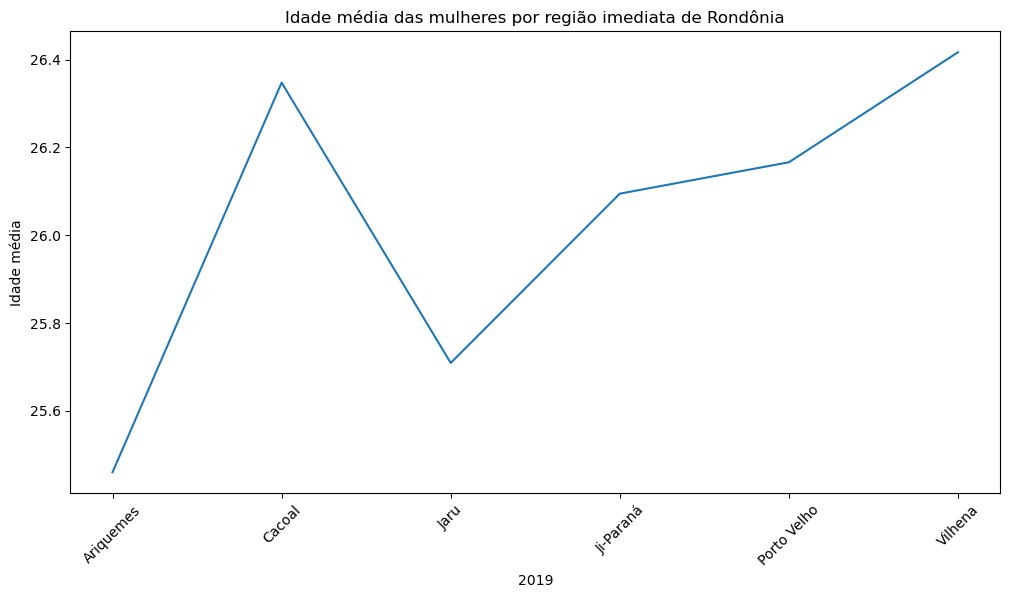

In [16]:
grouped = sinasc_2.groupby(imediatas)['IDADEMAE'].mean()

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values)

plt.xlabel('2019')
plt.ylabel('Idade média')
plt.title('Idade média das mulheres por região imediata de Rondônia')
plt.xticks(rotation=45)
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [31]:
# Caminho para o arquivo Excel
estadosidh = 'IDH-M.xlsx'

# Lendo o arquivo Excel
df_idh = pd.read_excel(estadosidh)
df_idh = df_idh.dropna()

# Convertendo a coluna 'IDH' para valores numéricos
df_idh['IDH'] = pd.to_numeric(df_idh['IDH'], errors='coerce')

# Definindo os limites das faixas de IDH
faixas = [0, 0.600, 0.700, 0.800,]

# Definindo os rótulos das faixas
rotulos = ['Baixo', 'Médio', 'Alto']

# Criando a coluna de faixas de IDH
df_idh['Faixa de IDH'] = pd.cut(df_idh['IDH'], bins=faixas, labels=rotulos, right=False)

df_idh


,munResNome,IDH,Faixa de IDH
0,Porto Velho,0.73600,Alto
1,Vilhena,0.73100,Alto
2,Cacoal,0.71800,Alto
3,Ji-Paraná,0.71400,Alto
4,Pimenta Bueno,0.71000,Alto
5,Ariquemes,0.70200,Alto
6,Rolim de Moura,0.70000,Alto
7,Cerejeiras,0.69200,Médio
8,Jaru,0.68900,Médio
9,Colorado do Oeste,0.68500,Médio


In [18]:
# agregando por faixa de PIB
agregado_idh = df_idh.groupby('Faixa de IDH').agg({'IDH': ['mean','min', 'max', 'sum', 'median', 'std','var']})

agregado_idh

IDH                                                 
                  mean    min    max     sum median       std       var
Faixa de IDH                                                           
Baixo         0.591333  0.584  0.598   5.322  0.592  0.004848  0.000023
Médio         0.643250  0.607  0.692  23.157  0.643  0.024046  0.000578
Alto          0.715857  0.700  0.736   5.011  0.714  0.013668  0.000187

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [32]:
# Caminho para o arquivo Excel
estadosifdm = 'IFDM.xlsx'

# Lendo o arquivo Excel
df_ifdm = pd.read_excel(estadosifdm)
df_ifdm = df_ifdm.fillna(0.6199)

# Convertendo a coluna 'IFDM' para valores numéricos
df_ifdm['IFDM'] = pd.to_numeric(df_ifdm['IFDM'], errors='coerce')

# Definindo os limites das faixas de IFDM
faixas = [0.40000, 0.60000, 0.80000,]

# Definindo os rótulos das faixas
rotulos = ['Regular', 'Moderado']

# Criando a coluna de faixas de IFDM
df_ifdm['Faixa de IFDM'] = pd.cut(df_ifdm['IFDM'], bins=faixas, labels=rotulos, right=False)

df_ifdm


,munResNome,IFDM,Faixa de IFDM
0,Ariquemes,0.77460,Moderado
1,Vilhena,0.74650,Moderado
2,Pimenta Bueno,0.73830,Moderado
3,Porto Velho,0.72570,Moderado
4,Ji-Paraná,0.71170,Moderado
5,Cacoal,0.71110,Moderado
6,Santa Luzia d'Oeste,0.68500,Moderado
7,Rolim de Moura,0.67850,Moderado
8,Chupinguaia,0.67660,Moderado
9,São Miguel do Guaporé,0.66990,Moderado


In [20]:
# agregando por faixa de PIB
agregado_ifdm = df_ifdm.groupby('Faixa de IFDM').agg({'IFDM': ['mean','min', 'max', 'sum', 'median', 'std', 'var']})

agregado_ifdm

IFDM                                                      
                   mean     min     max      sum   median       std       var
Faixa de IFDM                                                                
Regular        0.556362  0.4562  0.5973  14.4654  0.56415  0.034401  0.001183
Moderado       0.659919  0.6006  0.7746  17.1579  0.64615  0.048485  0.002351

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [33]:

# Caminho para o arquivo Excel
estadospib = 'PIB.xlsx'

# Lendo o arquivo Excel
df_pib = pd.read_excel(estadospib)
df_pib = df_pib.dropna()

# Removendo espaços em branco da coluna 'PIB'
df_pib['PIB'] = df_pib['PIB'].str.replace(' ', '')

# Convertendo a coluna 'PIB' para valores numéricos
df_pib['PIB'] = pd.to_numeric(df_pib['PIB'], errors='coerce')

# Definindo os limites das faixas de PIB
faixas = [0, 100000, 200000, 300000, 500000, 1000000, float('inf')]

# Definindo os rótulos das faixas
rotulos = ['Até 100 milhões', 'Acima de 100 milhões', 'Acima de 200 milhões', 'Acima de 300 milhões', 'Acima de 500 milhões', 'Acima de 1 bilhão']

# Criando a coluna de faixas de PIB
df_pib['Faixa de PIB'] = pd.cut(df_pib['PIB'], bins=faixas, labels=rotulos)

df_pib


,munResNome,PIB,Faixa de PIB
0,Porto Velho,17912070,Acima de 1 bilhão
1,Ji-Paraná,3783972,Acima de 1 bilhão
2,Vilhena,2831175,Acima de 1 bilhão
3,Ariquemes,2579830,Acima de 1 bilhão
4,Cacoal,2261644,Acima de 1 bilhão
5,Jaru,1500890,Acima de 1 bilhão
6,Rolim de Moura,1283434,Acima de 1 bilhão
7,Pimenta Bueno,1164877,Acima de 1 bilhão
8,Guajará-Mirim,893000,Acima de 500 milhões
9,Ouro Preto do Oeste,834000,Acima de 500 milhões


In [22]:
# Configurando para exibir sem notação científica
pd.set_option('display.float_format', '{:.5f}'.format)

# agregando por faixa de PIB
agregado_pib = df_pib.groupby('Faixa de PIB').agg({'PIB': ['mean','min', 'max', 'sum', 'median', 'std', 'var']})

agregado_pib

PIB                                             \
                              mean      min       max       sum        median   
Faixa de PIB                                                                    
Até 100 milhões        72946.87500    52908     92346    583575   74422.50000   
Acima de 100 milhões  147844.68750   105208    190331   2365515  144314.00000   
Acima de 200 milhões  211370.25000   204098    219152    845481  211115.50000   
Acima de 300 milhões  387857.14286   335000    496000   2715000  360000.00000   
Acima de 500 milhões  656777.77778   507000    893000   5911000  625000.00000   
Acima de 1 bilhão    4164736.50000  1164877  17912070  33317892 2420737.00000   

                                                         
                               std                  var  
Faixa de PIB                                             
Até 100 milhões        12209.83417      149080050.41071  
Acima de 100 milhões   28159.15236      792937861.56250  
Acima de 200 milhões    6431.70555       41366836.25000  
Acima de 300 milhões   56259.60236     3165142857.14286  
Acima de 500 milhões  135014.60826    18228944444.44444  
Acima de 1 bilhão    5624479.34363 31634767886867.43359

In [23]:
# Junção dos DataFrames
df_pesoidh = pd.merge(df_idh, sinasc_raw, on='munResNome')

# Agrupamento no DataFrame mesclado
pesoidh = df_pesoidh.groupby('munResNome').agg({'PESO': ['mean', 'median'], 'IDH': ['mean', 'median']})
pesoidh


PESO                IDH        
                                mean     median    mean  median
munResNome                                                     
Alto Alegre dos Parecis   3261.38312 3262.50000 0.59200 0.59200
Alto Paraíso              3217.96903 3255.00000 0.62500 0.62500
Ariquemes                 3251.36264 3275.00000 0.70200 0.70200
Buritis                   3229.87650 3240.00000 0.61600 0.61600
Cabixi                    3336.10000 3355.00000 0.65000 0.65000
Cacaulândia               3232.36000 3260.00000 0.64600 0.64600
Cacoal                    3249.72052 3257.50000 0.71800 0.71800
Campo Novo de Rondônia    3227.96988 3277.50000 0.59300 0.59300
Candeias do Jamari        3296.30564 3325.00000 0.64900 0.64900
Castanheiras              3206.31250 3175.00000 0.65800 0.65800
Cerejeiras                3168.36709 3260.00000 0.69200 0.69200
Chupinguaia               3317.41975 3347.50000 0.65200 0.65200
Colorado do Oeste         3231.89720 3307.50000 0.68500 0.68500
Corumbiara                3294.68504 3280.00000 0.61300 0.61300
Costa Marques             3249.72103 3270.00000 0.61100 0.61100
Cujubim                   3292.24390 3300.00000 0.61200 0.61200
Governador Jorge Teixeira 3238.99107 3217.50000 0.59600 0.59600
Guajará-Mirim             3293.09475 3320.00000 0.65700 0.65700
Itapuã do Oeste           3308.83486 3295.00000 0.61400 0.61400
Jaru                      3277.67196 3260.00000 0.68900 0.68900
Ji-Paraná                 3253.07837 3270.00000 0.71400 0.71400
Ministro Andreazza        3135.59524 3162.50000 0.63800 0.63800
Mirante da Serra          3147.58537 3185.00000 0.64300 0.64300
Monte Negro               3217.06030 3250.00000 0.60700 0.60700
Nova Mamoré               3248.85185 3280.00000 0.58700 0.58700
Nova União                3193.22115 3170.00000 0.58700 0.58700
Novo Horizonte do Oeste   3244.74490 3270.00000 0.63400 0.63400
Ouro Preto do Oeste       3226.83518 3245.00000 0.68200 0.68200
Parecis                   3096.36364 3110.00000 0.61700 0.61700
Pimenta Bueno             3305.43019 3320.00000 0.71000 0.71000
Pimenteiras do Oeste      3340.35000 3368.00000 0.66500 0.66500
Porto Velho               3242.82008 3280.00000 0.73600 0.73600
Presidente Médici         3173.06579 3221.00000 0.66400 0.66400
Primavera de Rondônia     3185.58140 3290.00000 0.64100 0.64100
Rio Crespo                3202.76000 3315.00000 0.64300 0.64300
Rolim de Moura            3223.44552 3260.00000 0.70000 0.70000
Seringueiras              3289.14286 3337.50000 0.59800 0.59800
São Francisco do Guaporé  3295.56436 3340.00000 0.61100 0.61100
São Miguel do Guaporé     3177.98867 3230.00000 0.64600 0.64600
Teixeirópolis             3185.25000 3182.50000 0.64300 0.64300
Theobroma                 3227.86598 3230.00000 0.58900 0.58900
Urupá                     3190.94118 3230.00000 0.60900 0.60900
Vale do Anari             3223.80645 3230.00000 0.58400 0.58400
Vale do Paraíso           3353.92593 3310.00000 0.62700 0.62700
Vilhena                   3230.25031 3272.00000 0.73100 0.73100

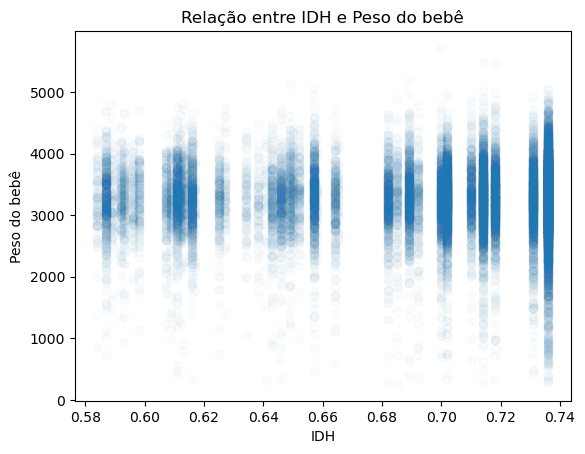

In [24]:
# Extrair as colunas "PESO" e "IDH" do DataFrame mesclado
peso = df_pesoidh['PESO']
idh = df_pesoidh['IDH']

# Criar o gráfico de dispersão
plt.scatter(idh, peso, alpha=0.018)
plt.xlabel('IDH')
plt.ylabel('Peso do bebê')
plt.title('Relação entre IDH e Peso do bebê')

# Exibir o gráfico
plt.show()

In [25]:
# Junção dos DataFrames
df_idademaeifdm = pd.merge(df_ifdm, sinasc_raw, on='munResNome')

# Agrupamento no DataFrame mesclado
idademaeifdm = df_idademaeifdm.groupby('munResNome').agg({'IDADEMAE': ['mean', 'median'], 'IFDM': ['mean', 'median']})
idademaeifdm


IDADEMAE             IFDM        
                              mean   median    mean  median
munResNome                                                 
Alto Alegre dos Parecis   24.84416 25.00000 0.50460 0.50460
Alto Paraíso              24.96018 24.00000 0.57350 0.57350
Ariquemes                 25.60787 25.00000 0.77460 0.77460
Buritis                   25.55918 25.00000 0.61990 0.61990
Cabixi                    26.03750 26.00000 0.58870 0.58870
Cacaulândia               25.54667 25.00000 0.57210 0.57210
Cacoal                    26.89010 26.00000 0.71110 0.71110
Campo Novo de Rondônia    24.82530 25.00000 0.52720 0.52720
Candeias do Jamari        25.24332 25.00000 0.61990 0.61990
Castanheiras              27.28125 27.00000 0.54300 0.54300
Cerejeiras                27.24051 27.00000 0.61370 0.61370
Chupinguaia               25.33333 25.00000 0.67660 0.67660
Colorado do Oeste         27.60280 28.00000 0.64730 0.64730
Corumbiara                24.71654 24.00000 0.57590 0.57590
Costa Marques             24.41202 23.00000 0.56260 0.56260
Cujubim                   24.48293 23.00000 0.50550 0.50550
Governador Jorge Teixeira 24.40179 24.00000 0.45620 0.45620
Guajará-Mirim             25.46223 24.00000 0.55410 0.55410
Itapuã do Oeste           26.06422 26.00000 0.59030 0.59030
Jaru                      25.98297 25.00000 0.64500 0.64500
Ji-Paraná                 26.36114 26.00000 0.71170 0.71170
Ministro Andreazza        27.90476 28.00000 0.56570 0.56570
Mirante da Serra          26.30488 26.00000 0.55190 0.55190
Monte Negro               25.64824 25.00000 0.60160 0.60160
Nova Mamoré               25.32639 25.00000 0.50840 0.50840
Nova União                26.89423 26.50000 0.55710 0.55710
Novo Horizonte do Oeste   26.93878 26.00000 0.58580 0.58580
Ouro Preto do Oeste       26.37559 26.00000 0.62610 0.62610
Parecis                   26.45455 26.00000 0.55020 0.55020
Pimenta Bueno             25.19968 25.00000 0.73830 0.73830
Pimenteiras do Oeste      25.07500 25.00000 0.65010 0.65010
Porto Velho               26.31267 26.00000 0.72570 0.72570
Presidente Médici         25.79605 25.00000 0.61400 0.61400
Primavera de Rondônia     27.02326 26.00000 0.63840 0.63840
Rio Crespo                26.66000 26.50000 0.64300 0.64300
Rolim de Moura            26.60086 26.00000 0.67850 0.67850
Seringueiras              24.91071 24.00000 0.59220 0.59220
São Francisco do Guaporé  25.66007 25.00000 0.62140 0.62140
São Miguel do Guaporé     25.92635 26.00000 0.66990 0.66990
Teixeirópolis             26.03125 26.00000 0.65000 0.65000
Theobroma                 25.53608 24.00000 0.54050 0.54050
Urupá                     26.68824 27.00000 0.60060 0.60060
Vale do Anari             26.09677 26.00000 0.57100 0.57100
Vale do Paraíso           25.67901 26.00000 0.58180 0.58180
Vilhena                   26.43396 26.00000 0.74650 0.74650

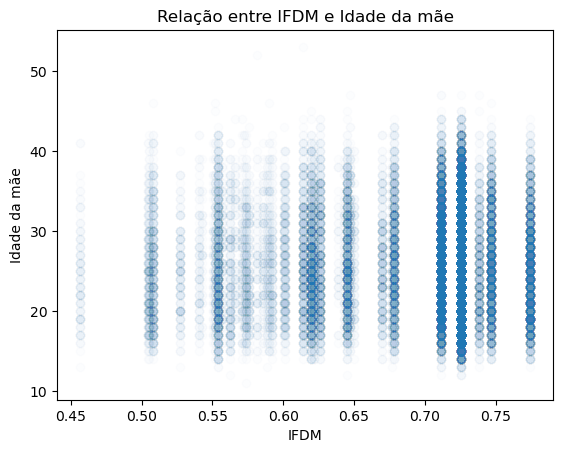

In [26]:
# Extrair as colunas "PESO" e "IDH" do DataFrame mesclado
idademae = df_idademaeifdm['IDADEMAE']
idh = df_idademaeifdm['IFDM']

# Criar o gráfico de dispersão
plt.scatter(idh, idademae, alpha=0.01)
plt.xlabel('IFDM')
plt.ylabel('Idade da mãe')
plt.title('Relação entre IFDM e Idade da mãe')

# Exibir o gráfico
plt.show()

In [27]:
# Junção dos DataFrames
df_idadepaiifdm = pd.merge(df_ifdm, sinasc_raw, on='munResNome')

# Agrupamento no DataFrame mesclado
idadepaiifdm = df_idadepaiifdm.groupby('munResNome').agg({'IDADEPAI': ['mean', 'median'], 'IFDM': ['mean', 'median']})
idadepaiifdm


IDADEPAI             IFDM        
                              mean   median    mean  median
munResNome                                                 
Alto Alegre dos Parecis   29.17910 28.00000 0.50460 0.50460
Alto Paraíso              28.83333 25.50000 0.57350 0.57350
Ariquemes                 32.46667 29.00000 0.77460 0.77460
Buritis                   30.81250 28.50000 0.61990 0.61990
Cabixi                    34.33333 35.50000 0.58870 0.58870
Cacaulândia               36.33333 33.50000 0.57210 0.57210
Cacoal                    30.93185 30.00000 0.71110 0.71110
Campo Novo de Rondônia    30.50000 29.50000 0.52720 0.52720
Candeias do Jamari        29.89474 30.00000 0.61990 0.61990
Castanheiras              30.39286 31.50000 0.54300 0.54300
Cerejeiras                31.65278 32.00000 0.61370 0.61370
Chupinguaia               29.62963 29.00000 0.67660 0.67660
Colorado do Oeste         34.35484 34.00000 0.64730 0.64730
Corumbiara                32.47059 30.00000 0.57590 0.57590
Costa Marques             30.61364 28.50000 0.56260 0.56260
Cujubim                   31.40000 34.50000 0.50550 0.50550
Governador Jorge Teixeira 29.22222 28.00000 0.45620 0.45620
Guajará-Mirim             30.47059 30.00000 0.55410 0.55410
Itapuã do Oeste           42.50000 40.00000 0.59030 0.59030
Jaru                      32.19718 31.00000 0.64500 0.64500
Ji-Paraná                 31.13224 30.00000 0.71170 0.71170
Ministro Andreazza        33.84932 33.00000 0.56570 0.56570
Mirante da Serra          32.15476 32.00000 0.55190 0.55190
Monte Negro               34.67857 36.00000 0.60160 0.60160
Nova Mamoré               31.69231 32.00000 0.50840 0.50840
Nova União                31.37143 30.00000 0.55710 0.55710
Novo Horizonte do Oeste   31.58824 30.00000 0.58580 0.58580
Ouro Preto do Oeste       31.23324 31.00000 0.62610 0.62610
Parecis                   32.47368 32.00000 0.55020 0.55020
Pimenta Bueno             29.74517 29.00000 0.73830 0.73830
Pimenteiras do Oeste      35.60000 36.00000 0.65010 0.65010
Porto Velho               32.35268 32.00000 0.72570 0.72570
Presidente Médici         30.15075 29.00000 0.61400 0.61400
Primavera de Rondônia     31.88889 33.00000 0.63840 0.63840
Rio Crespo                28.00000 28.00000 0.64300 0.64300
Rolim de Moura            30.36048 29.00000 0.67850 0.67850
Seringueiras              30.50000 29.00000 0.59220 0.59220
São Francisco do Guaporé  31.63889 31.00000 0.62140 0.62140
São Miguel do Guaporé     32.66667 32.00000 0.66990 0.66990
Teixeirópolis             31.50000 29.50000 0.65000 0.65000
Theobroma                 30.08333 28.50000 0.54050 0.54050
Urupá                     31.00893 30.00000 0.60060 0.60060
Vale do Anari             34.00000 34.00000 0.57100 0.57100
Vale do Paraíso           29.97674 30.00000 0.58180 0.58180
Vilhena                   34.15294 34.00000 0.74650 0.74650

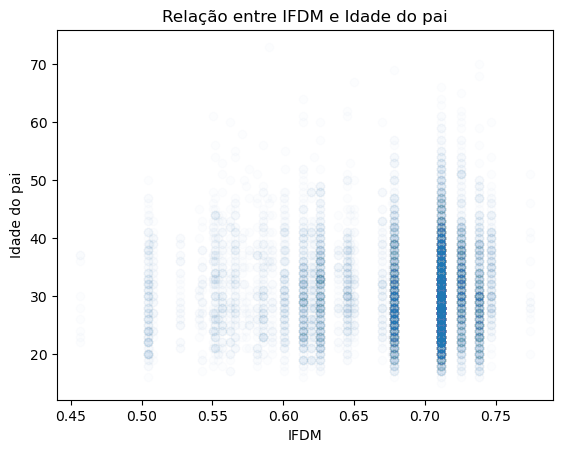

In [28]:
# Extrair as colunas "PESO" e "IDH" do DataFrame mesclado
idadepai = df_idadepaiifdm['IDADEPAI']
idh = df_idadepaiifdm['IFDM']

# Criar o gráfico de dispersão
plt.scatter(idh, idadepai, alpha=0.01)
plt.xlabel('IFDM')
plt.ylabel('Idade do pai')
plt.title('Relação entre IFDM e Idade do pai')

# Exibir o gráfico
plt.show()

In [29]:
# Junção dos DataFrames
df_idadepaiidh = pd.merge(df_idh, sinasc_raw, on='munResNome')

# Agrupamento no DataFrame mesclado
idadepaiidh = df_idadepaiidh.groupby('munResNome').agg({'IDADEPAI': ['mean', 'median'], 'IDH': ['mean', 'median']})
idadepaiidh


IDADEPAI              IDH        
                              mean   median    mean  median
munResNome                                                 
Alto Alegre dos Parecis   29.17910 28.00000 0.59200 0.59200
Alto Paraíso              28.83333 25.50000 0.62500 0.62500
Ariquemes                 32.46667 29.00000 0.70200 0.70200
Buritis                   30.81250 28.50000 0.61600 0.61600
Cabixi                    34.33333 35.50000 0.65000 0.65000
Cacaulândia               36.33333 33.50000 0.64600 0.64600
Cacoal                    30.93185 30.00000 0.71800 0.71800
Campo Novo de Rondônia    30.50000 29.50000 0.59300 0.59300
Candeias do Jamari        29.89474 30.00000 0.64900 0.64900
Castanheiras              30.39286 31.50000 0.65800 0.65800
Cerejeiras                31.65278 32.00000 0.69200 0.69200
Chupinguaia               29.62963 29.00000 0.65200 0.65200
Colorado do Oeste         34.35484 34.00000 0.68500 0.68500
Corumbiara                32.47059 30.00000 0.61300 0.61300
Costa Marques             30.61364 28.50000 0.61100 0.61100
Cujubim                   31.40000 34.50000 0.61200 0.61200
Governador Jorge Teixeira 29.22222 28.00000 0.59600 0.59600
Guajará-Mirim             30.47059 30.00000 0.65700 0.65700
Itapuã do Oeste           42.50000 40.00000 0.61400 0.61400
Jaru                      32.19718 31.00000 0.68900 0.68900
Ji-Paraná                 31.13224 30.00000 0.71400 0.71400
Ministro Andreazza        33.84932 33.00000 0.63800 0.63800
Mirante da Serra          32.15476 32.00000 0.64300 0.64300
Monte Negro               34.67857 36.00000 0.60700 0.60700
Nova Mamoré               31.69231 32.00000 0.58700 0.58700
Nova União                31.37143 30.00000 0.58700 0.58700
Novo Horizonte do Oeste   31.58824 30.00000 0.63400 0.63400
Ouro Preto do Oeste       31.23324 31.00000 0.68200 0.68200
Parecis                   32.47368 32.00000 0.61700 0.61700
Pimenta Bueno             29.74517 29.00000 0.71000 0.71000
Pimenteiras do Oeste      35.60000 36.00000 0.66500 0.66500
Porto Velho               32.35268 32.00000 0.73600 0.73600
Presidente Médici         30.15075 29.00000 0.66400 0.66400
Primavera de Rondônia     31.88889 33.00000 0.64100 0.64100
Rio Crespo                28.00000 28.00000 0.64300 0.64300
Rolim de Moura            30.36048 29.00000 0.70000 0.70000
Seringueiras              30.50000 29.00000 0.59800 0.59800
São Francisco do Guaporé  31.63889 31.00000 0.61100 0.61100
São Miguel do Guaporé     32.66667 32.00000 0.64600 0.64600
Teixeirópolis             31.50000 29.50000 0.64300 0.64300
Theobroma                 30.08333 28.50000 0.58900 0.58900
Urupá                     31.00893 30.00000 0.60900 0.60900
Vale do Anari             34.00000 34.00000 0.58400 0.58400
Vale do Paraíso           29.97674 30.00000 0.62700 0.62700
Vilhena                   34.15294 34.00000 0.73100 0.73100

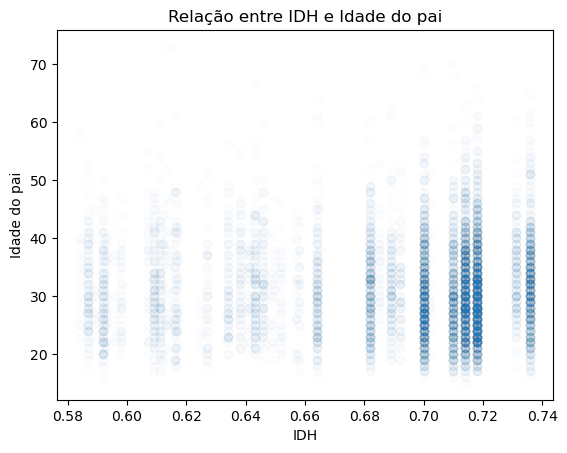

In [30]:
# Extrair as colunas "PESO" e "IDH" do DataFrame mesclado
idadepai = df_idadepaiidh['IDADEPAI']
idh = df_idadepaiidh['IDH']

# Criar o gráfico de dispersão
plt.scatter(idh, idadepai, alpha=0.01)
plt.xlabel('IDH')
plt.ylabel('Idade do pai')
plt.title('Relação entre IDH e Idade do pai')

# Exibir o gráfico
plt.show()

### Analisando as respostas encontradas, tirei alguns insights delas, aqui estão algumas das respostas que encontrei:

* A análise dos dados revelou que cidades com maior Índice de Desenvolvimento Humano (IDH) apresentaram uma tendência de ter bebês com peso mais elevado. Isso sugere uma possível relação entre o nível de desenvolvimento humano e a saúde dos recém-nascidos, destacando a importância de fatores socioeconômicos e qualidade de vida na saúde materna e infantil. Essa descoberta pode direcionar políticas de saúde e recursos para melhorar os cuidados pré-natais e promover a equidade no acesso aos serviços de saúde.

* É interessante observar que existe uma correlação entre o IFDM (Índice Firjan de Desenvolvimento Municipal), o IDH (Índice de Desenvolvimento Humano) e a idade tanto das mães quanto dos pais nas cidades. Pode-se perceber que cidades com um IFDM e IDH mais elevados tendem a ter tanto mães quanto pais com idade mais avançada. Isso pode indicar que nessas cidades há um melhor desenvolvimento socioeconômico, acesso a serviços de saúde, oportunidades educacionais e conscientização sobre planejamento familiar. Essa relação sugere que fatores como educação, renda, qualidade de vida e acesso a recursos influenciam nas decisões reprodutivas dos casais, levando ao adiamento da parentalidade. Esses resultados ressaltam a importância de políticas públicas voltadas para o desenvolvimento social e de programas de saúde e educação reprodutiva nessas localidades.

* A região imediata de Cacoal e Vilhena apresenta uma média de idade das mulheres acima de 26.3, indicando uma tendência de maternidade em idades mais avançadas nessas áreas. Isso sugere a presença de fatores socioeconômicos e educacionais que influenciam na decisão de adiar a maternidade, refletindo mudanças sociais e um maior foco na obtenção de estabilidade e oportunidades antes de iniciar uma família. Esses insights podem orientar políticas públicas e serviços de saúde direcionados às mulheres em idade reprodutiva nessas regiões, bem como contribuir para a compreensão das dinâmicas demográficas locais.

* Impacto das Faixas de PIB: À medida que o PIB aumenta, observamos um crescimento considerável nos valores de soma total do PIB. Por exemplo, as regiões com PIB acima de 300 milhões têm uma soma total do PIB de 2.7 bilhões, enquanto as regiões com PIB acima de 1 bilhão têm uma soma total do PIB de 33.3 bilhões. Isso ressalta o impacto econômico significativo que regiões com PIB mais alto podem ter na economia como um todo.

* De acordo com os dados fornecidos, a média do Índice de Desenvolvimento Humano (IDH) de Rondônia está acima da média nacional do Brasil em 2010. A média do IDH de Rondônia é de 0,71586, enquanto a média nacional brasileira é de aproximadamente 0,724. Portanto, podemos concluir que, em média, Rondônia apresenta um nível de desenvolvimento humano próximo à média nacional e está acima da faixa de IDH médio.